
#### Importing Libraries

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

![kneeding](https://media.giphy.com/media/RpckSiHL6ZaXS/giphy.gif)

# Enhancing Regression Models

Objectives, be able to use:

Pre-processing:
- handling non-numeric data
 - ordinal: label encoder
 - categorical: one-hot-encoder (which do you drop?)
 - binary encoder
- Scaling

Creating New:
- Interaction terms
- Polynomials
- combinations of other variables

Evaluating:
- R^2 vs adjusted R^2
- AIC
- BIC
- comparing model performance metrics - metrics going up or down?


## Scenario: car seat sales

Description: simulated data set on sales of car seats<br>
Format: 400 observations on the following 11 variables
- Sales: unit sales at each location
- CompPrice: price charged by nearest competitor at each location
- Income: community income level
- Advertising: local advertising budget for company at each location
- Population: population size in region (in thousands)
- Price: price charged for car seat at each site
- ShelveLoc: quality of shelving location at site (Good | Bad | Medium)
- Age: average age of the local population
- Education: education level at each location
- Urban: whether the store is in an urban or rural location
- USA: whether the store is in the US or not

 We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

#### Task
Before looking at the data, brainstorm with your neighbor which four variables you think *might* be related to sales.

In [117]:
df2 = pd.read_csv('Carseats.csv')
df2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [64]:
df2.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

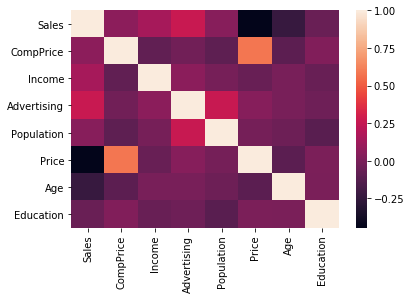

In [25]:
# import seaborn as sns
# df2.hist(figsize=(10,10))
sns.heatmap(df2.corr())

In [37]:
x_vars=list(df2.columns[df2.columns!='Sales'])
formula = 'Sales ~' + '+'.join(x_vars)
model = smf.ols(formula, df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        11:09:37   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
df2_log = df2
df2_log['log_CompPrice'] = np.log(df2_log['CompPrice'])

In [119]:
model = smf.ols('Sales ~ Income:Advertising+Price:Age + ' + "+".join(x_vars),data= df2)

In [141]:
from itertools import combinations

df_combo = df2
df_combo_vars = df_combo.drop('Sales',axis=1)
numerical = df2.select_dtypes(exclude='object').drop('Sales',axis=1)

combos = combinations(list(numerical),2)
for combo in combos:
    interaction = (':'.join(combo))
    formula = 'Sales ~' + '+'.join(list(df_combo_vars))+ '+' + (interaction)
    model = smf.ols(formula,df_combo)
    results = model.fit()
    print(results.rsquared)

0.8768876439363767
0.8738177498775038
0.8743806209958576
0.8737316982693998
0.8744602398173815
0.8737236753040729
0.873753222331195
0.8762520021409335
0.8754049247429405
0.8753264531654648
0.8738844999428331
0.8737945170741233
0.8769320673205827
0.8737224226084483
0.874038619278495
0.8742977556916882
0.8737218058454393
0.8738120384088809
0.8737244032699772
0.8737257800689031
0.8737214740339492
0.8744231134332816
0.8740499138430962
0.873739870867265
0.8737324665793634
0.8738742655064158
0.8744138510843135
0.8737372547774493


In [5]:
results = model.fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 29 Aug 2019   Prob (F-statistic):          6.14e-166
Time:                        12:19:06   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Task 
Again, with your neighbor:
- What issues do you see with this model?
- What would you change?

To learn how to set other coding schemes (or _contrasts_), see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/contrasts.html

### Polynomials

![polynomials](https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2015/12/11/emotionandincome-01_0.png)

In [39]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import BinaryEncoder

In [73]:
df2_one_hot = df2
onehot_cat = df2_one_hot.select_dtypes(include='object')
onehot_num = df2_one_hot.select_dtypes(exclude='object')

ohc = OneHotEncoder(sparse=False)
ohc.fit(df2_one_hot[['ShelveLoc']])
ohc_transform = pd.DataFrame(ohc.transform(df2_one_hot[['ShelveLoc']]))
ohc_transform.head()
ohc_2col = ohc_transform.drop(columns=0)
df_final_onehot = pd.concat([df2_one_hot,ohc_2col],axis=1)
df_final_onehot = df_final_onehot.drop(columns=['ShelveLoc'])
df_final_onehot.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,1,2
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0.0,0.0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,1.0,0.0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0.0,1.0
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0.0,1.0
4,4.15,141,64,3,340,128,38,13,Yes,No,0.0,0.0


In [104]:
x_vars=list(df_final_onehot.columns[df_final_onehot.columns!='Sales'])
x_vars[-2:] = ['num1','num2']

In [105]:
formula = 'Sales ~' + '+'.join(list(x_vars))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        12:00:17   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# from sklearn.preprocessing import PolynomialFeature
from sklearn.preprocessing import LabelEncoder, Binarizer

`medv ~ lstat + np.square(lstat)`

In [107]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [108]:
df_standard = df2
numeric_data = df_standard.select_dtypes(exclude='object') # selecting only numerical data
numeric_data.drop('Sales',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
scaler = StandardScaler()
scaler.fit_transform(df_standard[['CompPrice']])

for feature in list(numeric_data):
    scaler = StandardScaler()
    df_standard[feature] = scaler.fit_transform(df_standard[[feature]])
    
x_vars = df_standard.drop('Sales',axis=1)
formula = 'Sales ~' + '+'.join(list(x_vars))

smf.ols(formula,data=df_standard)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        12:00:23   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df2_log = df2
df2_log['Log_CompPrice'] = np.log(df2)

### Evaluating
#### Using `statsmodels`

![albon2](./img/aic-albon.png)

**AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.


**BIC**:	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

Want to be lower. Lower is better.

`results.aic`<br>
`results.bic`

![r-sqared](https://qph.fs.quoracdn.net/main-qimg-b932057f732059158062cf0ad9c1719f.webp)

![adj-r-sqr](https://i.stack.imgur.com/BTGK6.png)

`results.rsquared()`<br>
`results.rsquared_adj()`
